In [1]:
import tensorflow as tf

2024-01-23 09:50:27.115297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 09:50:33.289190: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-23 09:50:33.289262: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-23 09:50:50.003781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [2]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

### Exploration de la donnée

In [3]:
training_images.shape # 28, 28 longueur largeur de l'image

(60000, 28, 28)

In [4]:
training_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
training_labels.shape

(60000,)

In [8]:
labels = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandals", "shirt",
         "sneaker", "bag", "ankle boot"]

labels

['t-shirt/top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandals',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [9]:
training_images[45]

array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,  34, 148, 202, 107,
         84, 162, 198,  90,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 107, 166, 168, 152, 204, 238,
        248, 237, 190, 142, 178, 158,  98,  17,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  55, 188, 140, 131, 121, 119, 116, 146,
        157, 132, 115, 136, 125, 140, 143, 181,  51,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 167, 134, 113, 130, 134, 140, 132, 125,
        125, 131, 135, 130, 133, 131, 115, 135, 163,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 148, 133, 124, 134, 128, 135, 128, 133,
        130, 133, 137, 138, 130, 124, 130, 133, 147,  82,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 148, 158, 139, 124, 120, 131, 134, 132,
        134, 124, 134, 132, 137, 126, 137, 136, 146, 114,   0,   0,   0,
          0,   0],
       [  

In [10]:
training_images.min(), training_images.max()

(0, 255)

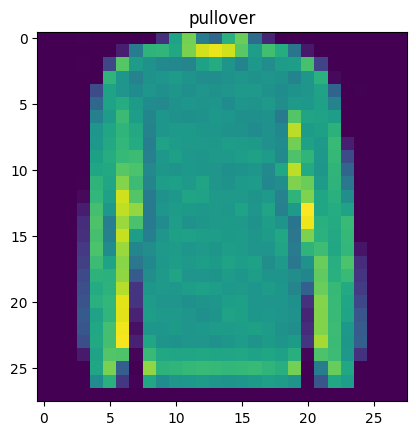

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_images[45])
plt.title(labels[training_labels[45]])
plt.show()

In [12]:
training_labels[45]

2

In [13]:
training_labels.min(), training_labels.max()

(0, 9)

In [14]:
labels[2]

'pullover'

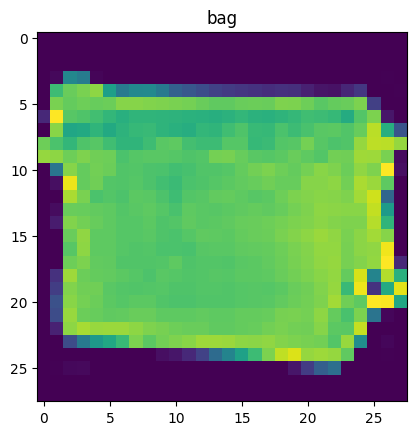

In [15]:
import matplotlib.pyplot as plt
plt.imshow(training_images[12345])
plt.title(labels[training_labels[12345]])
plt.show()

### Flatten (Applatir l'images)

In [16]:
     # A  B  C
#De  # D  E  F    passer à [A, B, C, D, E, F, G, H, I]
     # G  H  I

In [17]:
training_images.shape

(60000, 28, 28)

In [18]:
a_training_images = training_images.reshape((60000, 28*28))
a_test_images = test_images.reshape((-1, 28*28))

In [19]:
a_training_images.shape, a_test_images.shape

((60000, 784), (10000, 784))

### One Hot Encoding

In [20]:
#   Pays à catégoriser par
# |        |      |
# | France |  0   |
# | USA    |  1   |
# | Mali   |  2   |
# |        |      |
#
# Donc pour 5 personnes on prédit les valeurs
#
#  a) Mohamed 1
#  b) Bill    2
#  c) Ahmed   0
#  d) Elimson 0
#  e) Bignon  1
#
#  Pays =  France  |  USA  |  Mali
#
#   a)  =     0    |  1    |   0
#   b)  =     0    |  0    |   1
#   c)  =     0    |  0    |   0
#   d)  =     0    |  0    |   0
#   e)  =     0    |  1    |   0


In [21]:
import numpy as np

x = np.array([1, 2, 1, 0, 3])

In [22]:
tf.keras.utils.to_categorical(x)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [23]:
training_labels.shape

(60000,)

In [24]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

training_labels.shape

(60000, 10)

In [25]:
training_labels[45]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### La fonction Softmax (pour maximiser le loss)

In [26]:
def Softmax(vect):
    r = np.exp(np.array(vect))
    return r/sum(r)

In [27]:
output = [6, 3, 2]

In [28]:
6/(6+3+2)

0.5454545454545454

In [29]:
3/(6+3+2)

0.2727272727272727

In [30]:
2/(6+3+2)

0.18181818181818182

In [31]:
6/(6+3+2) + 3/(6+3+2) + 2/(6+3+2)

1.0

In [32]:
Softmax(output)
# On agrandi l'élément qui est le plus important
# On a maximiser la probabilité de la bonne classe et minimiser celle des mauvaises classes

array([0.93623955, 0.04661262, 0.01714783])

### Normalisation de la donnée

In [33]:
# On a souvent des images avec valeur de pixels plus élevée
a_training_images.min(), a_training_images.max()

(0, 255)

In [34]:
# Normalisation afin qu'on soit entre 0 et 1
a_training_images = a_training_images / 255.0
a_test_images = a_test_images / 255.0

In [35]:
a_training_images.min(), a_training_images.max()

(0.0, 1.0)

### Notre premier modele

In [36]:
from tensorflow.keras.models import Sequential  #Notre classe Model  
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential([Dense(units=784, activation="sigmoid"), 
               Dense(units=10, activation="softmax"),
              ])
# Dernière couche avec 10 neurones parce que après le One Hot Encoding on a 10 classe à prédire
# L'activation softmax 

# Dans les cas de classification, la manière de calculer le loss(mse) n'est pas vraiment la meilleure option pour évaluer l'efficacité de notre modele
# Dans ce cas on utilise le pourcentage de bonne classification Acccuracy.
# Exp: [ 0, 1, 0, 1, 1]. Accuracy = 3/5
model.compile(loss="mse", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

2024-01-23 09:51:45.172215: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-23 09:51:45.175272: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-23 09:51:45.175364: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elimson-HP-250-G7-Notebook-PC): /proc/driver/nvidia/version does not exist
2024-01-23 09:51:45.212482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0886 - accuracy: 0.2654 - val_loss: 0.0863 - val_accuracy: 0.3192
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0843 - accuracy: 0.3941 - val_loss: 0.0821 - val_accuracy: 0.4147
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0797 - accuracy: 0.4523 - val_loss: 0.0773 - val_accuracy: 0.4858
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0748 - accuracy: 0.5015 - val_loss: 0.0724 - val_accuracy: 0.5346
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0699 - accuracy: 0.5476 - val_loss: 0.0677 - val_accuracy: 0.5592


In [37]:
import matplotlib.pyplot as plt

def plot_accurency_curv(history):    
    plt.plot(list(range(len(history["accuracy"]))), history["accuracy"], label="accuracy")
    plt.plot(list(range(len(history["val_accuracy"]))), history["val_accuracy"], label="val_accuracy")    
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.title("Learning Curve")
    plt.legend(loc="upper right")
    plt.show()
    
def plot_loss_curv(history):    
    plt.plot(list(range(len(history["loss"]))), history["loss"], label="loss")
    plt.plot(list(range(len(history["val_loss"]))), history["val_loss"], label="val_loss")    
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title("Learning Curve")
    plt.legend(loc="upper right")
    plt.show()
    

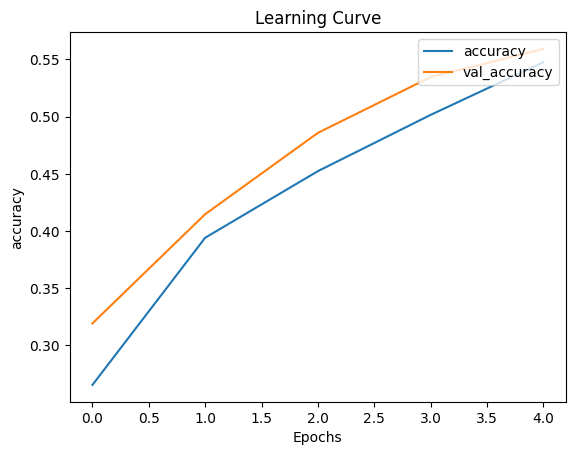

In [38]:
plot_accurency_curv(h.history)

### MSE vs Cross-entropy ou Log loss

In [39]:
def mse(target, prediction):
    loss = (target - prediction) ** 2
    return loss

In [40]:
def log_loss(target, prediction):
    # if target == 1:        
    loss = - 1 * np.log(prediction)
    # elif target == 0:
    #     loss = - 1 * np.log(1 - prediction)
    return loss

In [41]:
prediction = np.arange(0, 1, 0.01)
prediction

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [42]:
target = np.ones_like(prediction)
# np.zeros_like
target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

/tmp/ipykernel_3644/2272373943.py:3: RuntimeWarning: divide by zero encountered in log
  loss = - 1 * np.log(prediction)


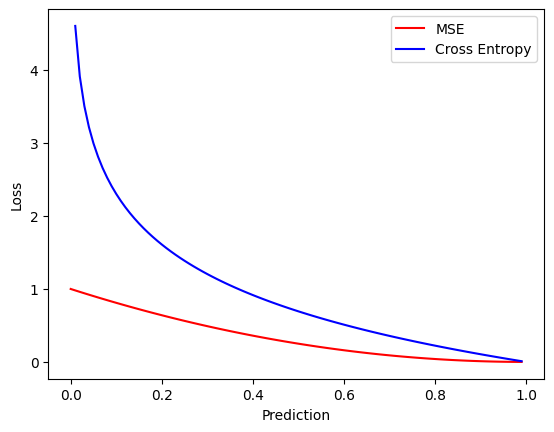

In [44]:
plt.plot(prediction, loss_mse, c="red", label="MSE")
plt.plot(prediction, loss_ce, c="blue", label="Cross Entropy")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [45]:
def log_loss(target, prediction):
    # if target == 1:        
    #    loss = - 1 * np.log(prediction)
    # elif target == 0:
    loss = - 1 * np.log(1 - prediction)
    return loss

In [46]:
target = np.zeros_like(prediction)
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
loss_mse = mse(target, prediction)
loss_ce = log_loss(target, prediction)

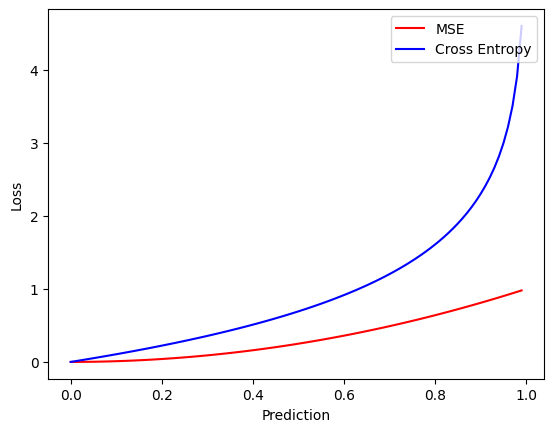

In [48]:
plt.plot(prediction, loss_mse, c="red", label="MSE")
plt.plot(prediction, loss_ce, c="blue", label="Cross Entropy")
plt.xlabel("Prediction")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

### Entrainement avec le crossentropy comme Loss

In [49]:
model = Sequential([Dense(units=784, activation="sigmoid"), 
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
 935/1875 [=============>................] - ETA: 5s - loss: 1.3893 - accuracy: 0.6174

KeyboardInterrupt: 

In [ ]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032

### Nouvelle fonction d'activation

In [50]:
# val = np.arange(-100, 100, 0.1)
val = np.arange(-5, 5, 0.1)

In [51]:
sig = tf.nn.sigmoid(val)

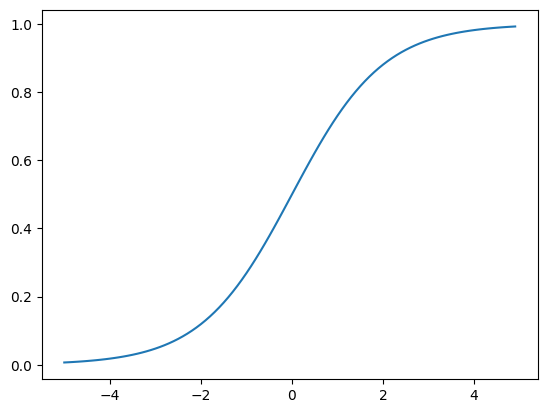

In [52]:
# Le probleme c'est qu'au alentour de 0 on a une dérivé de sigmoid importante par contre en s'éloignant de 0 la dérivé de sigmoid est presque nul car la courbe est constante
plt.plot(val, sig)
plt.show()

#### Le Rectified Linear Unit(RELU)

In [53]:
# Le principe:
# f(x) = x si x est sup ou egal à 0
# f(x) = 0 si x est inf à 0
# donc f(x) = max(x, 0). Si x = -2 alors f(-2) = max(-2, 0) = 0


In [54]:
def relu(vect):
    return np.maximum(0, vect)

In [55]:
relu_val = relu(val)

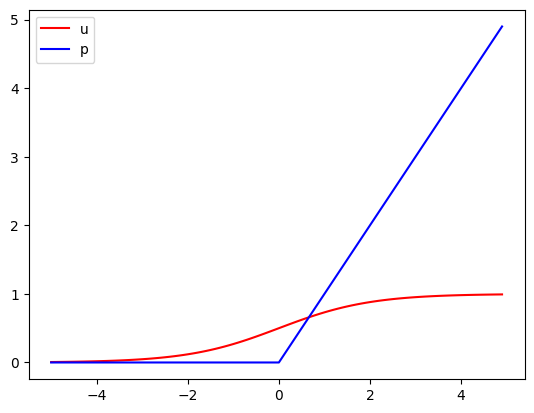

In [56]:
plt.plot(val, sig,  c='red', label="Sigmoid")
plt.plot(val, relu_val, c='blue', label="Relu")
plt.legend("upper right")
plt.show()

In [57]:
# Les valeurs négatives, relu les mets à 0 et contrairement à sigmoid oû 
# la deriv des valeurs positives mais éloigner de 0 sont nul, relu nous offre une deriv importante

In [141]:
model = Sequential([Dense(units=784, activation="relu"), 
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=5, validation_data=(a_test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6988 - accuracy: 0.7772 - val_loss: 0.5582 - val_accuracy: 0.8078
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4949 - accuracy: 0.8325 - val_loss: 0.4948 - val_accuracy: 0.8290
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4515 - accuracy: 0.8450 - val_loss: 0.4652 - val_accuracy: 0.8388
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4280 - accuracy: 0.8529 - val_loss: 0.4481 - val_accuracy: 0.8426
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486


In [142]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032
                    
CE + Relu: loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486

SyntaxError: invalid syntax (2117061100.py, line 1)

In [58]:
model = Sequential([Dense(units=784, activation="relu"), 
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
 461/1875 [======>.......................] - ETA: 8s - loss: 1.0080 - accuracy: 0.6990

KeyboardInterrupt: 

In [ ]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032
                    
CE + Relu: loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486
                    
CE + Relu(avec plus de epochs): loss: 0.3026 - accuracy: 0.8936 - val_loss: 0.3572 - val_accuracy: 0.8734

#### Plus de couche

In [58]:
model = Sequential([Dense(units=784, activation="relu"), 
                    Dense(units=128, activation="relu"),
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6725 - accuracy: 0.7816 - val_loss: 0.5022 - val_accuracy: 0.8268
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4650 - accuracy: 0.8392 - val_loss: 0.4660 - val_accuracy: 0.8336
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4232 - accuracy: 0.8520 - val_loss: 0.4366 - val_accuracy: 0.8460
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3984 - accuracy: 0.8614 - val_loss: 0.4210 - val_accuracy: 0.8490
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3783 - accuracy: 0.8678 - val_loss: 0.4264 - val_accuracy: 0.8471
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3641 - accuracy: 0.8718 - val_loss: 0.4093 - val_accuracy: 0.8540
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3500 - accuracy: 0.8773 - val_loss: 0.3851 - val_ac

In [ ]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032
                    
CE + Relu: loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486
                    
CE + Relu(avec plus de epochs): loss: 0.3026 - accuracy: 0.8936 - val_loss: 0.3572 - val_accuracy: 0.8734

model complexe : loss: 0.2493 - accuracy: 0.9100 - val_loss: 0.3277 - val_accuracy: 0.8850

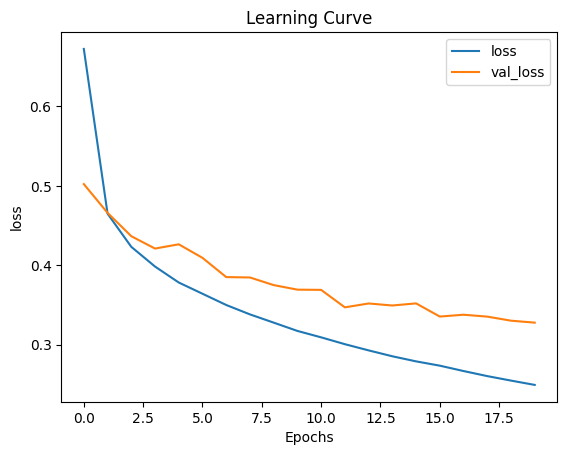

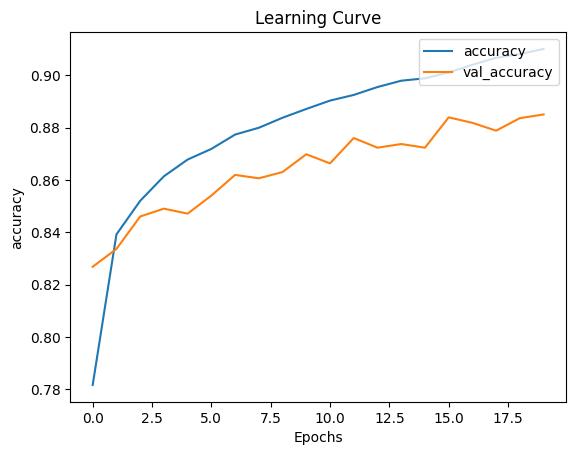

In [60]:
plot_loss_curv(h.history)
plot_accurency_curv(h.history)

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


### Combattre le Overfitting (Sur-apprentissage) : Dropout

In [59]:
# Overfitting : l'écart entre le loss et le val_loss ou accuracy et val_accuracy important en faveur de loss ou accuracy
# Lorsque la perfomance sur les données d'entrainements commence à être largement plus grande que la perfomance sur les données de test
# Cela se fait quand on a des neurones en sur-apprentissage
# Donc là on va essayer de bloquer l'apprentissage certains neurones

In [60]:
dropout = tf.keras.layers.Dropout(0.2, input_shape=(2,))


In [61]:
x = np.arange(1, 11).reshape(5, 2).astype(np.float32)
x

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

In [62]:
dropout(x, training=True)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 1.25,  0.  ],
       [ 3.75,  5.  ],
       [ 6.25,  7.5 ],
       [ 8.75,  0.  ],
       [11.25, 12.5 ]], dtype=float32)>

In [77]:
model = Sequential([Dense(units=784, activation="relu"), 
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                    tf.keras.layers.Dropout(0.3),
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8443 - accuracy: 0.7098 - val_loss: 0.5458 - val_accuracy: 0.8108
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5724 - accuracy: 0.8014 - val_loss: 0.4849 - val_accuracy: 0.8234
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5085 - accuracy: 0.8233 - val_loss: 0.4533 - val_accuracy: 0.8360
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4739 - accuracy: 0.8324 - val_loss: 0.4321 - val_accuracy: 0.8454
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4480 - accuracy: 0.8405 - val_loss: 0.4195 - val_accuracy: 0.8510
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4311 - accuracy: 0.8456 - val_loss: 0.4027 - val_accuracy: 0.8545
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4130 - accuracy: 0.8531 - val_loss: 0.3923 - val_ac

In [ ]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032
                    
CE + Relu: loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486
                    
CE + Relu(avec plus de epochs): loss: 0.3026 - accuracy: 0.8936 - val_loss: 0.3572 - val_accuracy: 0.8734

model complexe : loss: 0.2493 - accuracy: 0.9100 - val_loss: 0.3277 - val_accuracy: 0.8850
                    
model complexe dropout : loss: 0.3251 - accuracy: 0.8834 - val_loss: 0.3408 - val_accuracy: 0.8789

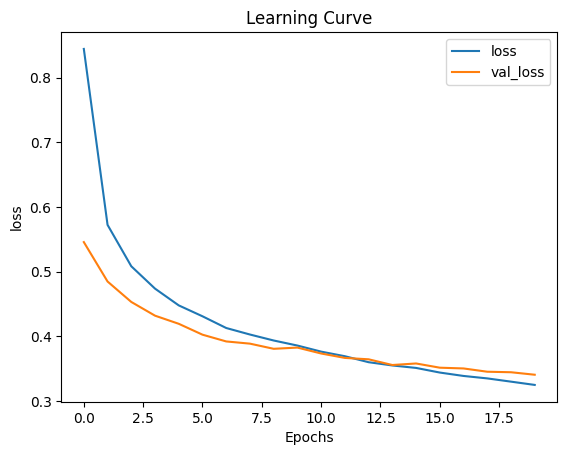

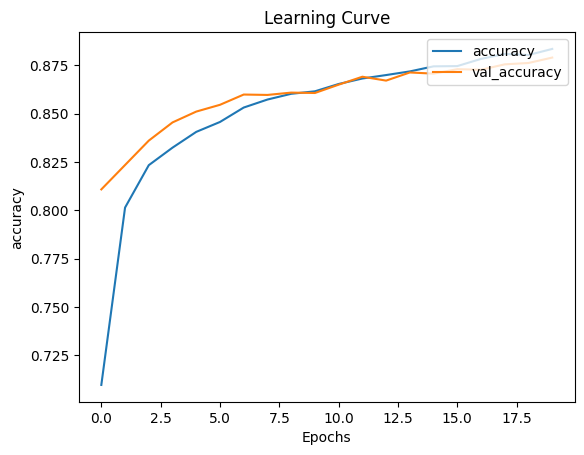

In [78]:
plot_loss_curv(h.history)
plot_accurency_curv(h.history)

### Adam optimizer

In [79]:
adam = tf.keras.optimizers.Adam(
learning_rate=0.01,
beta_1=0.9,
beta_2=0.999)

In [80]:
model = Sequential([Dense(units=784, activation="relu"), 
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                    tf.keras.layers.Dropout(0.3),
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, epochs=20, validation_data=(a_test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.9836 - accuracy: 0.6448 - val_loss: 0.6231 - val_accuracy: 0.7654
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.9018 - accuracy: 0.6706 - val_loss: 0.6558 - val_accuracy: 0.7607
Epoch 3/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.8865 - accuracy: 0.6722 - val_loss: 0.6005 - val_accuracy: 0.7876
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8841 - accuracy: 0.6781 - val_loss: 0.6333 - val_accuracy: 0.7274
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8889 - accuracy: 0.6751 - val_loss: 0.6537 - val_accuracy: 0.7701
Epoch 6/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.8757 - accuracy: 0.6838 - val_loss: 0.6331 - val_accuracy: 0.7712
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.8615 - accuracy: 0.6850 - val_loss: 0.6622 -

In [ ]:
MSE : loss: 0.0724 - accuracy: 0.5897 - val_loss: 0.0701 - val_accuracy: 0.5859

Cross Entropy: loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5549 - val_accuracy: 0.8032
                    
CE + Relu: loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.4328 - val_accuracy: 0.8486
                    
CE + Relu(avec plus de epochs): loss: 0.3026 - accuracy: 0.8936 - val_loss: 0.3572 - val_accuracy: 0.8734

model complexe : loss: 0.2493 - accuracy: 0.9100 - val_loss: 0.3277 - val_accuracy: 0.8850
                    
model complexe dropout : loss: 0.3251 - accuracy: 0.8834 - val_loss: 0.3408 - val_accuracy: 0.8789
                    
Adam : loss: 0.8580 - accuracy: 0.6956 - val_loss: 0.6138 - val_accuracy: 0.8009

### CallBack: Model Checkpoint

In [84]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [87]:
best_model = "best_model.h5"

model_ckp = ModelCheckpoint(filepath=best_model, 
                            # save_weights_only=True, 
                            monitor="val_accuracy", 
                            mode="max", 
                            save_best_only=True)

In [88]:
model = Sequential([Dense(units=784, activation="relu"), 
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                    tf.keras.layers.Dropout(0.3),
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, 
              epochs=30, 
              validation_data=(a_test_images, test_labels),
             callbacks=[model_ckp])

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8465 - accuracy: 0.7046 - val_loss: 0.5550 - val_accuracy: 0.7999
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5755 - accuracy: 0.7998 - val_loss: 0.4827 - val_accuracy: 0.8269
Epoch 3/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5103 - accuracy: 0.8205 - val_loss: 0.4494 - val_accuracy: 0.8378
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4724 - accuracy: 0.8322 - val_loss: 0.4303 - val_accuracy: 0.8437
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4482 - accuracy: 0.8409 - val_loss: 0.4174 - val_accuracy: 0.8497
Epoch 6/30
 985/1875 [==============>...............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8462

KeyboardInterrupt: 

In [91]:
model_save = tf.keras.models.load_model("best_model.h5")
model_save.evaluate(a_test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8497


[0.4174133241176605, 0.8496999740600586]

### Early Stopping

In [94]:
# Il stoppe tôt quand on a un meilleur modele sur n epoch

In [92]:
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                       patience=2
                                       )

In [93]:
model_ckpreshape

In [ ]:
model = Sequential([Dense(units=784, activation="relu"), 
                    tf.keras.layers.Dropout(0.5),
                    Dense(units=128, activation="relu"),
                    tf.keras.layers.Dropout(0.3),
               Dense(units=10, activation="softmax"),
              ])

model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=["accuracy"])
h = model.fit(a_training_images, training_labels, 
              epochs=30, 
              validation_data=(a_test_images, test_labels),
             callbacks=[model_ckp, stop])  # On peut définir notre prope callback

In [95]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir="./logs")

### Prediction

In [65]:
model_save = tf.keras.models.load_model("best_model.h5")

In [66]:
model_save.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 784)               615440    
                                                                 
 dropout_9 (Dropout)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


In [67]:
a_test_images[2500].shape

(784,)

In [68]:
test_labels[2500]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [69]:
np.argmax(test_labels[2500])

6

In [70]:
labels[6]

'shirt'

In [72]:
# pred = model_save.predict(a_test_images[2500])
# On a entrainé avec des données de shape (60000, 784), donc pour effectuer une prédiction on doit etre sur du (1, 784)
pred = model_save.predict(a_test_images[2500].reshape((1, 784)))

1/1 [==============================] - 0s 80ms/step


In [73]:
pred

array([[4.4360803e-03, 1.1023789e-03, 5.0411230e-01, 2.7305563e-03,
        1.2071426e-01, 1.4586025e-04, 3.6023691e-01, 1.2029943e-04,
        6.2556281e-03, 1.4582479e-04]], dtype=float32)

In [74]:
np.argmax(pred)

2

In [75]:
labels[2]

'pullover'